In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns


In [2]:
# Chargement des datasets
experience_salary = pd.read_csv("./Salary_Data.csv")
insurance = pd.read_csv("./insurance.csv")
china_gdp = pd.read_csv("./china_gdp.csv")

In [3]:
# Partie 1 : Exploration et visualisation
# Question 1 : Explorer les données
# Exploration des données des deux datasets
print("------------- Exploration du dataset Expérience-Salaire : -------------")
print(experience_salary.info())
print(experience_salary.head())

print("\n------------- Exploration du dataset Assurance : -------------")
print(insurance.info())
print(insurance.head())


------------- Exploration du dataset Expérience-Salaire : -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

------------- Exploration du dataset Assurance : -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 

In [4]:
# Question 2 : Résumé statistique avec interprétation
# Résumé statistique pour le dataset Expérience-Salaire
print("------------ Résumé statistique du dataset Expérience-Salaire : ------------")
print(experience_salary.describe())

# Résumé statistique pour le dataset Assurance
print("\n------------ Résumé statistique du dataset Assurance : ------------")
print(insurance.describe())


------------ Résumé statistique du dataset Expérience-Salaire : ------------
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

------------ Résumé statistique du dataset Assurance : ------------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.00

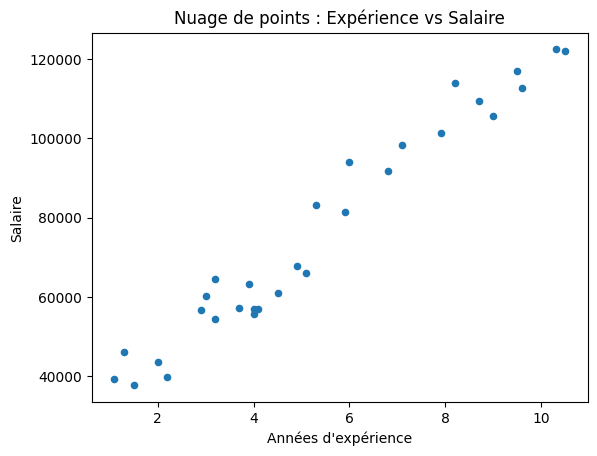

In [5]:
# Question 3 : Nuage des points pour le dataset Expérience-Salaire
experience_salary.plot(kind='scatter', x='YearsExperience', y='Salary', title='Expérience vs Salaire')

plt.xlabel('Années d\'expérience')
plt.ylabel('Salaire')
plt.title('Nuage de points : Expérience vs Salaire')
plt.show()


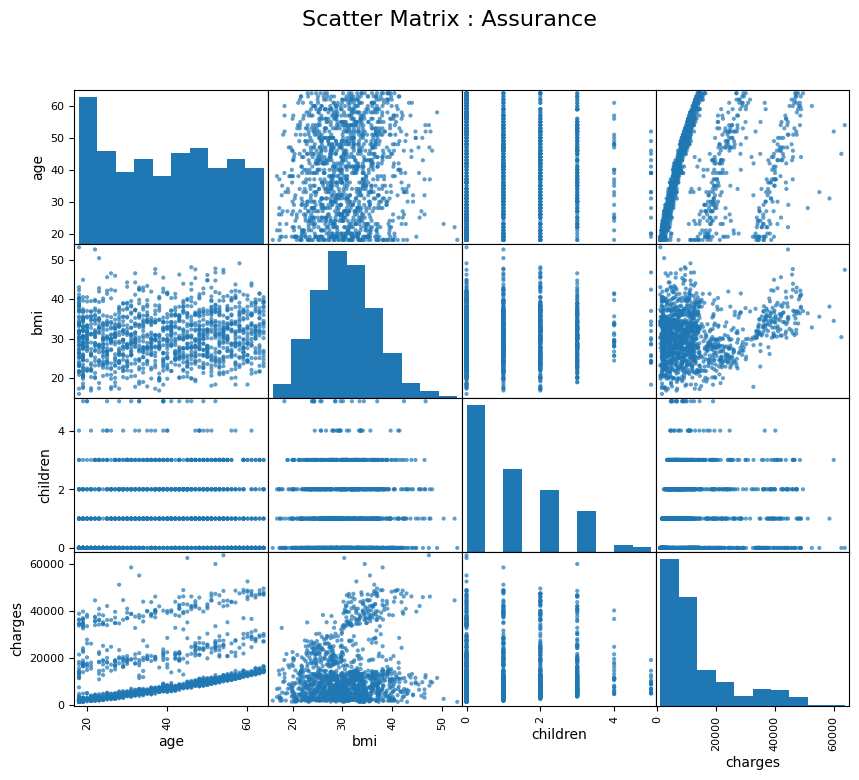

In [6]:
# Question 4 : Nuages des points pour le dataset assurance
# Sélection des colonnes numériques pour le scatter matrix
features = ['age', 'bmi', 'children', 'charges']
scatter_matrix(insurance[features], figsize=(10, 8), diagonal='hist', alpha=0.7)

plt.suptitle('Scatter Matrix : Assurance', fontsize=16)
plt.show()

In [7]:
# Partie 2 : Régression linéaire simple (Expérience vs Salaire)
# Question 1 : Entraîner le modèle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Séparation des données en variables explicatives (X) et cible (y)
X_exp = experience_salary[['YearsExperience']]
y_exp = experience_salary['Salary']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Affichage des coefficients du modèle
print(f"Coefficient de la régression : {model.coef_[0]}")
print(f"Intercept de la régression : {model.intercept_}")


Coefficient de la régression : 9423.815323030976
Intercept de la régression : 25321.583011776813


In [8]:
# Question 2 : Prédiction sur le dataset de test

y_pred = model.predict(X_test)

# Affichage des prédictions
print("Prédictions sur le dataset de test :")
print(y_pred)


Prédictions sur le dataset de test :
[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


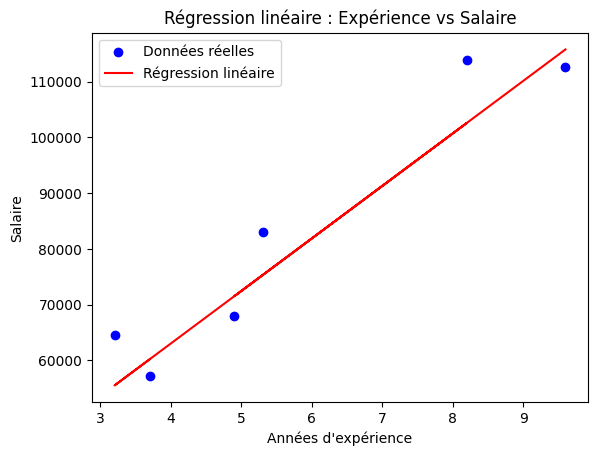

In [9]:
# Question 3 : Visualisation des résultats de la régression
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Régression linéaire')
plt.title('Régression linéaire : Expérience vs Salaire')
plt.xlabel('Années d\'expérience')
plt.ylabel('Salaire')
plt.legend()
plt.show()

In [10]:
# Question 4 : Evaluation du model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print("-------- Évaluation du modèle : --------")
print(f"Mean Squared Error (MSE) : {mse}")
print(f"Root Mean Squared Error (RMSE) : {rmse}")
print(f"Mean Absolute Error (MAE) : {mae}")


-------- Évaluation du modèle : --------
Mean Squared Error (MSE) : 49830096.85590839
Root Mean Squared Error (RMSE) : 7059.04362190151
Mean Absolute Error (MAE) : 6286.453830757749


In [11]:
# Partie 3 : Régression multiple (Assurance)

# Question 1 : EDA  (Exploratory Data Analysis)

# Aperçu des données
print("-------- Aperçu des données : --------")
print(insurance.head())

# Informations générales sur les données
print("\n-------- Informations générales : --------")
print(insurance.info())



-------- Aperçu des données : --------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

-------- Informations générales : --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [12]:
# Vérification des valeurs nulles
print("\n-------- Nombre de valeurs nulles par colonne : --------")
print(insurance.isnull().sum())

# Statistiques descriptives
print("\n-------- Statistiques descriptives : --------")
print(insurance.describe())




-------- Nombre de valeurs nulles par colonne : --------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

-------- Statistiques descriptives : --------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [13]:
# Analyse des variables catégoriques
print("\n-------- Distribution des colonnes catégoriques : --------")
print(insurance['sex'].value_counts())
print(insurance['smoker'].value_counts())
print(insurance['region'].value_counts())


-------- Distribution des colonnes catégoriques : --------
sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



-------- Matrice de corrélation : --------
                       age       bmi  children   charges  sex_male  \
age               1.000000  0.109272  0.042469  0.299008 -0.020856   
bmi               0.109272  1.000000  0.012759  0.198341  0.046371   
children          0.042469  0.012759  1.000000  0.067998  0.017163   
charges           0.299008  0.198341  0.067998  1.000000  0.057292   
sex_male         -0.020856  0.046371  0.017163  0.057292  1.000000   
smoker_yes       -0.025019  0.003750  0.007673  0.787251  0.076185   
region_northwest -0.000407 -0.135996  0.024806 -0.039905 -0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982  0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210 -0.004184   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.025019         -0.000407         -0.011642   
bmi                 0.003750         -0.135996          0.270025   
children            0.007673          0.024806     

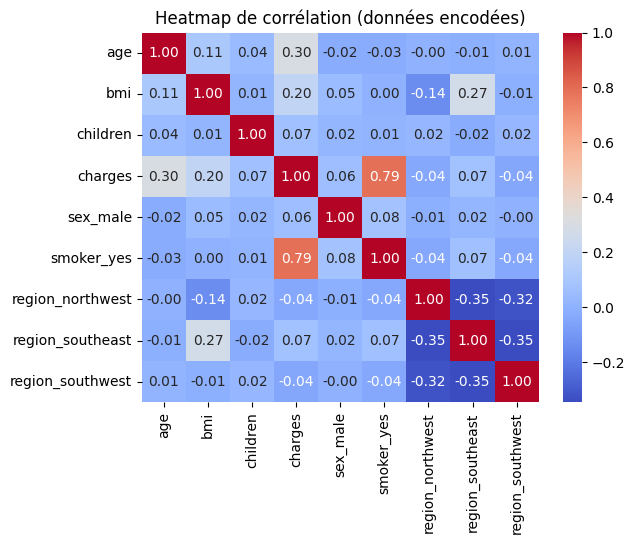

In [14]:
# Encoder les colonnes catégoriques en variables numériques
insurance_encoded = pd.get_dummies(insurance, drop_first=True)

# Matrice de corrélation pour les variables numériques
corr_matrix = insurance_encoded.corr()
print("\n-------- Matrice de corrélation : --------")
print(corr_matrix)

# Visualisation : Heatmap de la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de corrélation (données encodées)")
plt.show()


In [15]:
# Question 2 : Sélectionner 3 propriétés selon leurs dégrée d’importance


# 1. Calcul de la corrélation avec la variable cible
correlations = insurance_encoded.corr()
charges_corr = correlations['charges'].sort_values(ascending=False)
print("------ Corrélation avec 'charges' : ------")
print(charges_corr)

# 2. Affichage des 3 propriétés les plus corrélées
selected_features = charges_corr.index[1:4]  # Exclut 'charges' lui-même
print("\n------ Propriétés sélectionnées selon la corrélation : ------", selected_features.tolist())

# 3. Justification par Feature Importance avec un modèle
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

X = insurance_encoded[selected_features]
y = insurance_encoded['charges']

# Entraînement du modèle
model = LinearRegression()
model.fit(X, y)

# Importance des variables
importances = pd.DataFrame({'Feature': selected_features, 'Importance': model.coef_})
print("\n------ Importance des variables selon la régression : ------")
print(importances)


------ Corrélation avec 'charges' : ------
charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

------ Propriétés sélectionnées selon la corrélation : ------ ['smoker_yes', 'age', 'bmi']

------ Importance des variables selon la régression : ------
      Feature    Importance
0  smoker_yes  23823.684495
1         age    259.547492
2         bmi    322.615133


In [16]:
# Question 3 : technique de standardisation

from sklearn.preprocessing import StandardScaler

# Propriétés sélectionnées
selected_features = ['age', 'bmi', 'smoker_yes']

# Standardisation des propriétés choisies
scaler = StandardScaler()
X_standardized = scaler.fit_transform(insurance_encoded[selected_features])

# Création d'un DataFrame pour visualisation des résultats
X_standardized_df = pd.DataFrame(X_standardized, columns=selected_features)
print("\n--------- Propriétés standardisées : ---------")
print(X_standardized_df.head())


--------- Propriétés standardisées : ---------
        age       bmi  smoker_yes
0 -1.438764 -0.453320    1.970587
1 -1.509965  0.509621   -0.507463
2 -0.797954  0.383307   -0.507463
3 -0.441948 -1.305531   -0.507463
4 -0.513149 -0.292556   -0.507463


In [17]:
# Question 4 : Entraîner le modèle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sélection des variables explicatives et de la cible
X = X_standardized  # Variables standardisées sélectionnées ('age', 'bmi', 'smoker_yes')
y = insurance_encoded['charges']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Affichage des coefficients
print("\nCoefficients du modèle :")
for feature, coef in zip(['age', 'bmi', 'smoker_yes'], model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept : {model.intercept_:.4f}")



Coefficients du modèle :
age: 3643.3408
bmi: 1990.0105
smoker_yes: 9554.0342

Intercept : 13321.2930


In [18]:
# Question 5 : Prédire

# Prédire les données du dataset de test
y_pred = model.predict(X_test)

# Affichage des prédictions et des valeurs réelles
predictions_df = pd.DataFrame({
    'Valeurs réelles': y_test.values,
    'Valeurs prédites': y_pred
})

print("\nPrédictions sur le dataset de test :")
print(predictions_df.head())



Prédictions sur le dataset de test :
   Valeurs réelles  Valeurs prédites
0       9095.06825       8184.041468
1       5272.17580       7431.001001
2      29330.98315      37346.437099
3       9301.89355       8629.528305
4      33750.29180      27316.654810


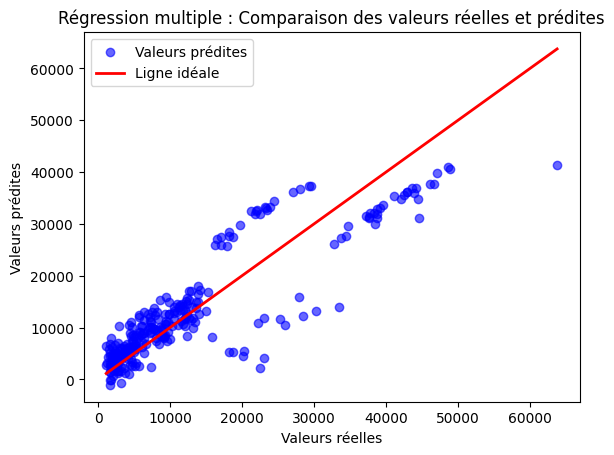

In [19]:
# Question 6 : Visualisation

# Visualisation des valeurs réelles vs valeurs prédites
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Valeurs prédites')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ligne idéale')
plt.title('Régression multiple : Comparaison des valeurs réelles et prédites')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()


In [20]:
# # Question 7 : Évaluation de modèle en utilisant ces trois méthodes :

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print("\n-------- Évaluation du modèle : --------")
print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")



-------- Évaluation du modèle : --------
Mean Squared Error (MSE) : 34512843.88
Root Mean Squared Error (RMSE) : 5874.76
Mean Absolute Error (MAE) : 4260.56
Coefficient de détermination (R²) : 0.78


In [21]:
# Partie 4 : Régression polynomiale (China GDP)
# Question 1 : Entraîner les modèles
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Séparation des variables explicatives (X) et cible (y)
X_gdp = china_gdp[['Year']]
y_gdp = china_gdp['Value']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_gdp, y_gdp, test_size=0.2, random_state=42)

# Modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Modèle de régression polynomiale (degré 4)
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Affichage des coefficients pour chaque modèle
print("\nCoefficients de la régression linéaire :")
print(f"Coef : {linear_model.coef_}, Intercept : {linear_model.intercept_}")

print("\nCoefficients de la régression polynomiale :")
print(f"Coef : {poly_model.coef_}, Intercept : {poly_model.intercept_}")




Coefficients de la régression linéaire :
Coef : [1.09727972e+11], Intercept : -216579790383883.8

Coefficients de la régression polynomiale :
Coef : [ 0.00000000e+00  6.04170555e+08  8.00117307e+11 -5.38980266e+08
  1.02111940e+05], Intercept : -5.224179684388893e+17


In [22]:
# Question 2 : Prédiction des données d’un data set de test pour les deux modèles .

# Prédiction avec le modèle de régression linéaire
linear_predictions = linear_model.predict(X_test)

# Prédiction avec le modèle de régression polynomiale
poly_predictions = poly_model.predict(X_test_poly)

# Affichage des prédictions
print("\n----- Prédictions du modèle de régression linéaire : -----")
print(linear_predictions[:5])

print("\n----- Prédictions du modèle de régression polynomiale : -----")
print(poly_predictions[:5])



----- Prédictions du modèle de régression linéaire : -----
[ 1.88860122e+12 -9.64326039e+11  1.99832920e+12 -8.65022655e+10
  5.71865565e+11]

----- Prédictions du modèle de régression polynomiale : -----
[-5.04822941e+10  2.41385689e+11  1.06164358e+10  5.04155164e+11
  2.24894391e+11]


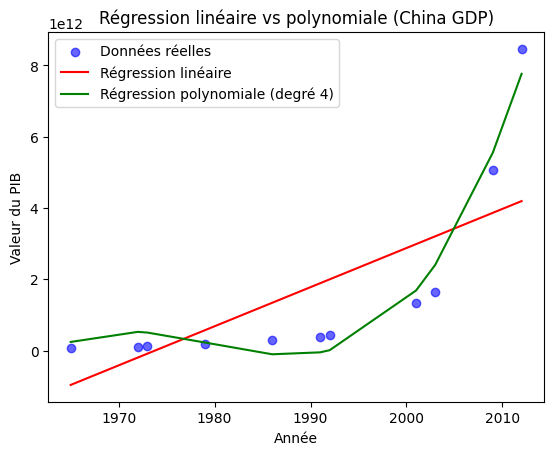

In [23]:
# Question 3 : Visualisation des résultats des deux modèles
# Trier les données de test et leurs prédictions pour éviter des oscillations dans la visualisation
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values[sorted_indices]
linear_predictions_sorted = linear_predictions[sorted_indices]
poly_predictions_sorted = poly_predictions[sorted_indices]

# Visualisation corrigée
plt.scatter(X_test, y_test, color='blue', label='Données réelles', alpha=0.6)

# Tracer les lignes de prédiction triées
plt.plot(X_test_sorted, linear_predictions_sorted, color='red', label='Régression linéaire')
plt.plot(X_test_sorted, poly_predictions_sorted, color='green', label='Régression polynomiale (degré 4)')

# Configuration du graphique
plt.title('Régression linéaire vs polynomiale (China GDP)')
plt.xlabel('Année')
plt.ylabel('Valeur du PIB')
plt.legend()
plt.show()


In [24]:
# Question 4 :  Évaluation des deux modèles en utilisant ces trois méthodes

from sklearn.metrics import r2_score

# Évaluation du modèle de régression linéaire
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Évaluation du modèle de régression polynomiale
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

# Affichage des résultats
print("\n----- Évaluation du modèle de régression linéaire : -----")
print(f"Mean Squared Error (MSE) : {linear_mse:.2f}")
print(f"Root Mean Squared Error (RMSE) : {linear_rmse:.2f}")
print(f"Mean Absolute Error (MAE) : {linear_mae:.2f}")
print(f"Coefficient de détermination (R²) : {linear_r2:.2f}")

print("\n----- Évaluation du modèle de régression polynomiale : -----")
print(f"Mean Squared Error (MSE) : {poly_mse:.2f}")
print(f"Root Mean Squared Error (RMSE) : {poly_rmse:.2f}")
print(f"Mean Absolute Error (MAE) : {poly_mae:.2f}")
print(f"Coefficient de détermination (R²) : {poly_r2:.2f}")



----- Évaluation du modèle de régression linéaire : -----
Mean Squared Error (MSE) : 2909722992049542559432704.00
Root Mean Squared Error (RMSE) : 1705791016522.70
Mean Absolute Error (MAE) : 1341446144991.78
Coefficient de détermination (R²) : 0.56

----- Évaluation du modèle de régression polynomiale : -----
Mean Squared Error (MSE) : 207534130192092768501760.00
Root Mean Squared Error (RMSE) : 455559140169.63
Mean Absolute Error (MAE) : 413445600606.50
Coefficient de détermination (R²) : 0.97
